In [38]:
import pandas as pd
import numpy as np

## Importing Data

In [39]:
crop = pd.read_csv('Crop_recommendation.csv')
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Ask Six Question to yourself

In [40]:
crop.shape

(2200, 8)

In [41]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [42]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [44]:
crop.duplicated().sum()

np.int64(0)

In [45]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Exploring Data

In [53]:
cr=crop.iloc[:,:-1]
cr

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [54]:
corr = cr.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

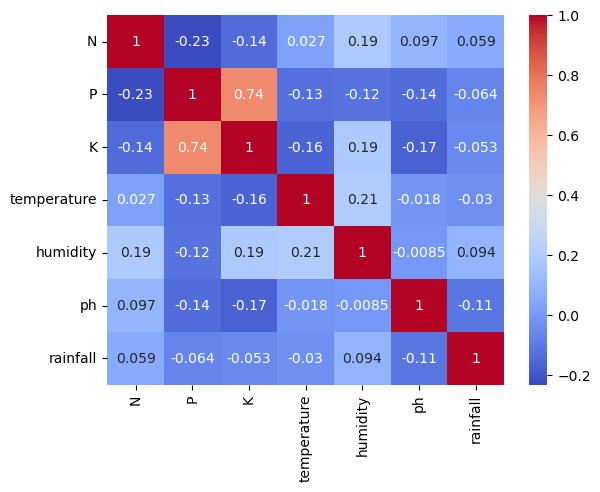

In [56]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [58]:
crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

C:\Users\nishant\AppData\Local\Temp\ipykernel_19860\2091051290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


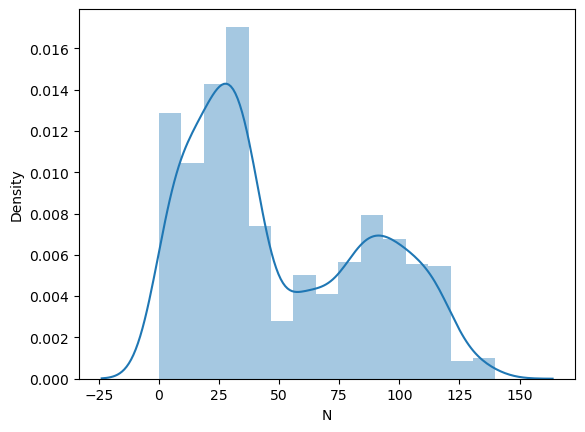

In [59]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

## Encoding

In [60]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [61]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

In [63]:
crop.drop('label',axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [64]:
x=crop.iloc[:,:-1]
y=crop.iloc[:,-1]

In [65]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [66]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64

In [67]:
x.shape

(2200, 7)

In [68]:
y.shape

(2200,)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [71]:
x_train.shape

(1474, 7)

In [72]:
x_test.shape

(726, 7)

## Scale the feature using MinMaxScaler

In [75]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

ms.fit(x_train)
x_train = ms.transform(x_train)
x_test = ms.transform(x_test)

In [76]:
x_train

array([[0.57857143, 0.07857143, 0.2       , ..., 0.83995947, 0.5011736 ,
        0.14162392],
       [0.22142857, 0.93571429, 0.96      , ..., 0.80595368, 0.33420072,
        0.18357291],
       [0.02142857, 0.41428571, 0.055     , ..., 0.54741671, 0.52316522,
        0.1178269 ],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43766892, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76775145, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56108125, 0.54465022,
        0.11879596]])

## Standardization

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [81]:
x_train

array([[ 7.85103870e-01, -1.11261654e+00, -6.71779400e-02, ...,
         6.51663360e-01,  3.32265152e-01, -7.68361572e-01],
       [-5.52904113e-01,  2.47697969e+00,  2.91028657e+00, ...,
         5.15937135e-01, -1.07726916e+00, -5.59461248e-01],
       [-1.30218858e+00,  2.93308652e-01, -6.35246827e-01, ...,
        -5.15953205e-01,  5.17911719e-01, -8.86867503e-01],
       ...,
       [-1.08810731e+00, -5.14350500e-01, -3.41418092e-01, ...,
        -9.53986078e-01,  1.41685870e-03, -4.34216179e-02],
       [-1.08810731e+00,  2.11802007e+00,  3.04740665e+00, ...,
         3.63461798e-01, -1.48646040e-01, -5.59990836e-01],
       [-5.26143953e-01,  7.42008180e-01, -5.17715333e-01, ...,
        -4.61414369e-01,  6.99281546e-01, -8.82041699e-01]])

## Training Models

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

for name, md in models.items():
    md.fit(x_train,y_train)
    ypred = md.predict(x_test)

    print(f"{name} With accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression With accuracy : 0.9641873278236914
Naive Bayes With accuracy : 0.9944903581267218
Support Vector Machine With accuracy : 0.9738292011019284
K-Nearest Neighbors With accuracy : 0.9586776859504132
Decision Tree With accuracy : 0.9752066115702479
Random Forest With accuracy : 0.9931129476584022
Bagging With accuracy : 0.9889807162534435
AdaBoost With accuracy : 0.1790633608815427
Gradient Boosting With accuracy : 0.9848484848484849
Extra Trees With accuracy : 0.8801652892561983


In [85]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred = rfc.predict(x_test)
accuracy_score(y_test,ypred)

0.9931129476584022

## Predictive System

In [89]:
def recommendation(N,P,k,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfall]])
    precision = rfc.predict(features).reshape(1,-1)

    return precision[0]

In [91]:
N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 30
rainfall = 50

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated".format(crop))
else:
    print("Scorry are not able to recommend a proper crop for this environment")

Apple is a best crop to be cultivated


In [92]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))